In [1]:
pip install pillow numpy matplotlib scikit-learn


In [4]:
import os
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# ========= CONFIGURE THIS =========
IMAGE_DIR = "E:/Ovarian Cystectomy"   # <--- CHANGE THIS
N_COLORS_PER_IMAGE = 6
MAX_PIXELS_PER_IMAGE = 150_000
RANDOM_STATE = 42
# ==================================


In [3]:
print(os.listdir(IMAGE_DIR))

['Dr Sanket Pisat - Ovarian Cystectomy for simple ovarian cyst- intact removal [TwmRiQCywQc - 1001x563 - 0m30s].png', 'Dr Sanket Pisat - Ovarian Cystectomy for simple ovarian cyst- intact removal [TwmRiQCywQc - 1001x563 - 0m42s].png', 'Dr Sanket Pisat - Ovarian Cystectomy for simple ovarian cyst- intact removal [TwmRiQCywQc - 1001x563 - 1m39s].png', 'Dr Sanket Pisat - Ovarian Cystectomy for simple ovarian cyst- intact removal [TwmRiQCywQc - 1001x563 - 1m49s].png', 'Dr Sanket Pisat - Ovarian Cystectomy for simple ovarian cyst- intact removal [TwmRiQCywQc - 1001x563 - 2m06s].png', 'Dr Sanket Pisat - Ovarian Cystectomy for simple ovarian cyst- intact removal [TwmRiQCywQc - 1001x563 - 2m29s].png', 'Dr Sanket Pisat - Ovarian Cystectomy for simple ovarian cyst- intact removal [TwmRiQCywQc - 1001x563 - 3m11s].png', 'Dr Sanket Pisat - Ovarian Cystectomy for simple ovarian cyst- intact removal [TwmRiQCywQc - 1001x563 - 3m32s].png', 'Dr Sanket Pisat - Ovarian Cystectomy for simple ovarian cyst- 

In [5]:
def load_image_pixels(path, max_pixels=MAX_PIXELS_PER_IMAGE):
    img = Image.open(path).convert("RGB")
    arr = np.array(img)
    pixels = arr.reshape(-1, 3).astype(np.float32)

    if len(pixels) > max_pixels:
        idx = np.random.choice(len(pixels), max_pixels, replace=False)
        pixels = pixels[idx]

    return pixels


def get_dominant_colors(pixels, n_colors=N_COLORS_PER_IMAGE):
    kmeans = KMeans(
        n_clusters=n_colors,
        random_state=RANDOM_STATE,
        n_init="auto"
    )
    labels = kmeans.fit_predict(pixels)
    centers = kmeans.cluster_centers_.astype(int)
    counts = np.bincount(labels, minlength=n_colors)

    idx_sorted = np.argsort(-counts)
    return centers[idx_sorted], counts[idx_sorted]


def display_color_bar(colors, counts, title=None):
    total = counts.sum()
    ratios = counts / total

    bar_width = 800
    bar_height = 80
    bar = np.zeros((bar_height, bar_width, 3), dtype=np.uint8)

    start = 0
    for color, ratio in zip(colors, ratios):
        end = start + int(ratio * bar_width)
        bar[:, start:end, :] = color
        start = end
    bar[:, start:, :] = colors[-1]

    plt.figure(figsize=(8, 2))
    plt.imshow(bar)
    plt.title(title)
    plt.axis("off")
    plt.show()


Found 10 PNG images.

=== Image: Dr Sanket Pisat - Ovarian Cystectomy for simple ovarian cyst- intact removal [TwmRiQCywQc - 1001x563 - 0m30s].png ===
Dominant colors:
  RGB (117, 69, 74)  -> 31.0%
  RGB (141, 96, 112)  -> 20.1%
  RGB (89, 44, 47)  -> 19.2%
  RGB (212, 181, 212)  -> 10.6%
  RGB (246, 233, 249)  -> 10.5%
  RGB (179, 133, 158)  ->  8.6%


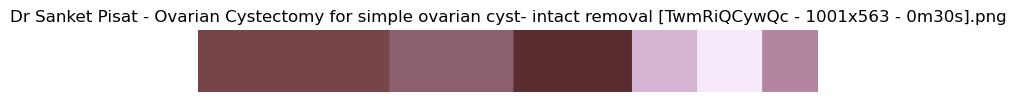


=== Image: Dr Sanket Pisat - Ovarian Cystectomy for simple ovarian cyst- intact removal [TwmRiQCywQc - 1001x563 - 0m42s].png ===
Dominant colors:
  RGB (94, 48, 42)  -> 29.4%
  RGB (66, 28, 22)  -> 19.5%
  RGB (117, 76, 69)  -> 18.4%
  RGB (152, 113, 100)  -> 14.0%
  RGB (185, 154, 144)  -> 11.8%
  RGB (222, 200, 189)  ->  6.9%


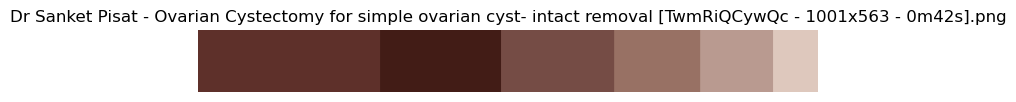


=== Image: Dr Sanket Pisat - Ovarian Cystectomy for simple ovarian cyst- intact removal [TwmRiQCywQc - 1001x563 - 1m39s].png ===
Dominant colors:
  RGB (101, 56, 50)  -> 33.4%
  RGB (77, 29, 26)  -> 22.0%
  RGB (125, 87, 82)  -> 17.1%
  RGB (157, 129, 124)  -> 12.3%
  RGB (199, 175, 168)  ->  9.5%
  RGB (242, 231, 226)  ->  5.6%


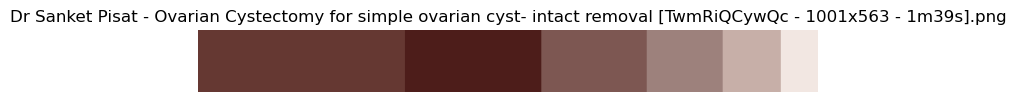


=== Image: Dr Sanket Pisat - Ovarian Cystectomy for simple ovarian cyst- intact removal [TwmRiQCywQc - 1001x563 - 1m49s].png ===
Dominant colors:
  RGB (100, 55, 48)  -> 30.8%
  RGB (80, 29, 23)  -> 22.2%
  RGB (125, 88, 82)  -> 16.8%
  RGB (153, 124, 113)  -> 14.3%
  RGB (181, 160, 151)  -> 10.2%
  RGB (220, 204, 203)  ->  5.7%


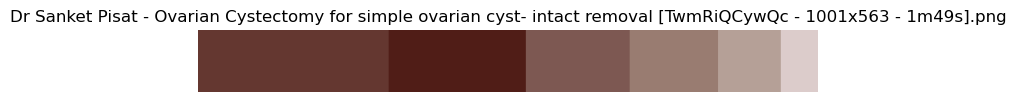


=== Image: Dr Sanket Pisat - Ovarian Cystectomy for simple ovarian cyst- intact removal [TwmRiQCywQc - 1001x563 - 2m06s].png ===
Dominant colors:
  RGB (95, 47, 38)  -> 35.9%
  RGB (68, 21, 16)  -> 18.7%
  RGB (118, 78, 70)  -> 16.4%
  RGB (144, 114, 106)  -> 15.0%
  RGB (168, 145, 140)  -> 11.2%
  RGB (207, 191, 191)  ->  2.8%


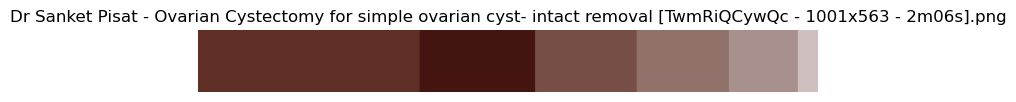


=== Image: Dr Sanket Pisat - Ovarian Cystectomy for simple ovarian cyst- intact removal [TwmRiQCywQc - 1001x563 - 2m29s].png ===
Dominant colors:
  RGB (103, 47, 37)  -> 30.4%
  RGB (124, 73, 61)  -> 26.6%
  RGB (145, 103, 95)  -> 16.6%
  RGB (65, 22, 16)  -> 11.8%
  RGB (178, 143, 132)  -> 11.1%
  RGB (216, 195, 192)  ->  3.6%


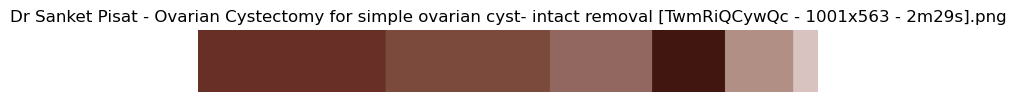


=== Image: Dr Sanket Pisat - Ovarian Cystectomy for simple ovarian cyst- intact removal [TwmRiQCywQc - 1001x563 - 3m11s].png ===
Dominant colors:
  RGB (132, 72, 57)  -> 30.7%
  RGB (109, 49, 39)  -> 23.2%
  RGB (145, 96, 83)  -> 22.7%
  RGB (170, 129, 118)  -> 11.0%
  RGB (76, 22, 14)  ->  9.1%
  RGB (214, 189, 189)  ->  3.3%


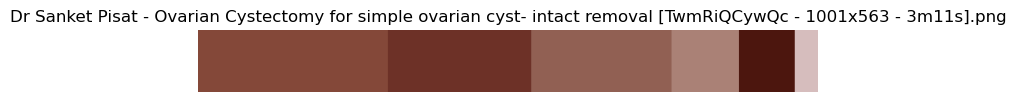


=== Image: Dr Sanket Pisat - Ovarian Cystectomy for simple ovarian cyst- intact removal [TwmRiQCywQc - 1001x563 - 3m32s].png ===
Dominant colors:
  RGB (97, 50, 42)  -> 28.1%
  RGB (128, 80, 70)  -> 23.5%
  RGB (64, 27, 20)  -> 18.4%
  RGB (165, 120, 112)  -> 12.9%
  RGB (206, 164, 154)  -> 10.4%
  RGB (247, 222, 211)  ->  6.7%


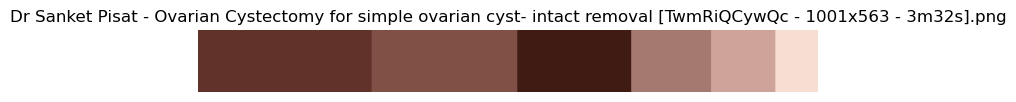


=== Image: Dr Sanket Pisat - Ovarian Cystectomy for simple ovarian cyst- intact removal [TwmRiQCywQc - 1001x563 - 3m47s].png ===
Dominant colors:
  RGB (69, 32, 25)  -> 31.0%
  RGB (48, 14, 8)  -> 27.9%
  RGB (97, 62, 53)  -> 15.4%
  RGB (125, 102, 94)  -> 12.3%
  RGB (169, 149, 141)  ->  7.9%
  RGB (226, 205, 194)  ->  5.4%


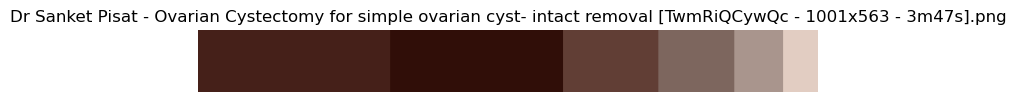


=== Image: Dr Sanket Pisat - Ovarian Cystectomy for simple ovarian cyst- intact removal [TwmRiQCywQc - 1001x563 - 6m40s].png ===
Dominant colors:
  RGB (88, 49, 44)  -> 25.7%
  RGB (62, 24, 20)  -> 23.7%
  RGB (160, 124, 114)  -> 15.8%
  RGB (128, 89, 81)  -> 15.5%
  RGB (199, 163, 150)  -> 11.9%
  RGB (237, 214, 200)  ->  7.3%


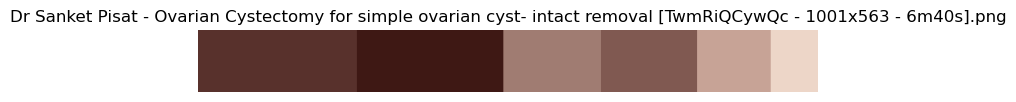

In [6]:
image_paths = sorted(glob.glob(os.path.join(IMAGE_DIR, "*.png")))
print(f"Found {len(image_paths)} PNG images.")

all_pixels = []

for path in image_paths:
    fname = os.path.basename(path)
    print("\n=== Image:", fname, "===")

    pixels = load_image_pixels(path)
    all_pixels.append(pixels)

    colors, counts = get_dominant_colors(pixels)

    # Print RGB + %
    total = counts.sum()
    print("Dominant colors:")
    for c, cnt in zip(colors, counts):
        pct = 100 * cnt / total
        print(f"  RGB {tuple(c)}  -> {pct:4.1f}%")

    # Show color spectrum bar
    display_color_bar(colors, counts, title=fname)



=== Combined Palette (All Images) ===
  RGB (99, 51, 44) -> 29.7%
  RGB (127, 82, 75) -> 21.8%
  RGB (65, 24, 19) -> 19.8%
  RGB (156, 120, 114) -> 14.5%
  RGB (194, 164, 159) ->  9.2%
  RGB (237, 219, 221) ->  5.0%


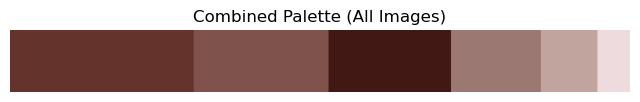

In [7]:
print("\n=== Combined Palette (All Images) ===")

all_pixels_concat = np.vstack(all_pixels)
comb_colors, comb_counts = get_dominant_colors(
    all_pixels_concat,
    n_colors=N_COLORS_PER_IMAGE
)

# Print combined colors
total_comb = comb_counts.sum()
for c, cnt in zip(comb_colors, comb_counts):
    pct = 100 * cnt / total_comb
    print(f"  RGB {tuple(c)} -> {pct:4.1f}%")

# Show combined palette bar
display_color_bar(comb_colors, comb_counts, 
                  title="Combined Palette (All Images)")


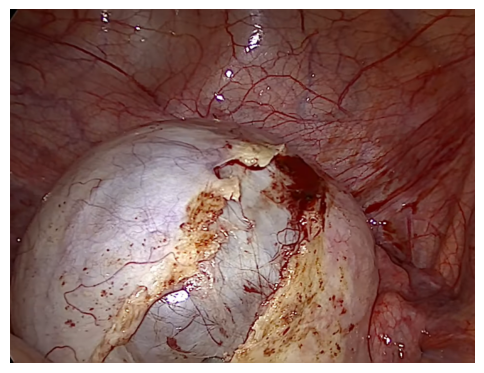

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = "E:/Ovarian Cystectomy/Dr Sanket Pisat - Ovarian Cystectomy for simple ovarian cyst- intact removal.png"  # change filename

img = Image.open(img_path)

plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis("off")
plt.show()
